In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import numpy as np

In [ ]:
from refiner.plotting import get_fig_with_legend, legend_kwargs, colors

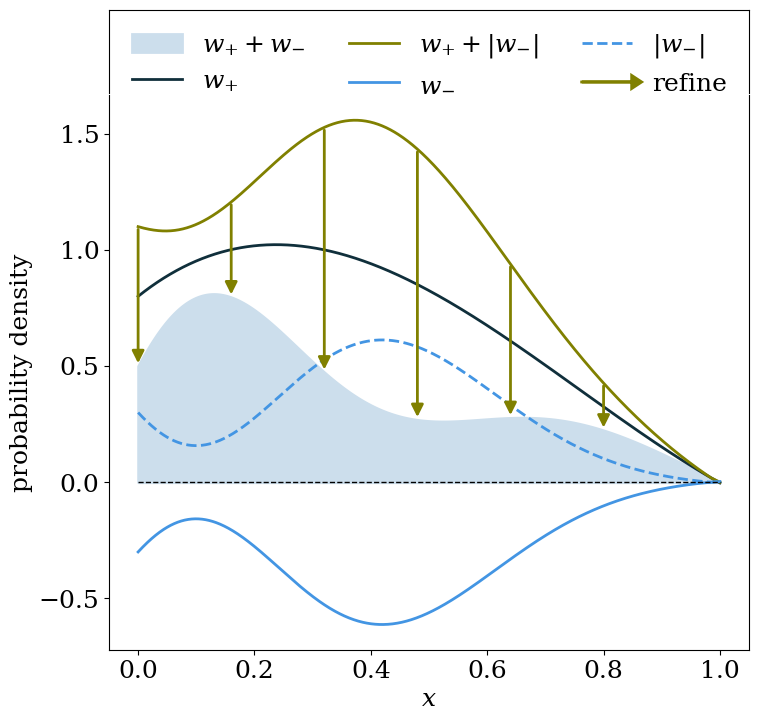

In [ ]:
x = np.linspace(0, 1, 1000)
x_arrow = np.linspace(0, 0.8, 6)

fig, (legend_axis, plot_axis) = get_fig_with_legend()

def pos(x):
    return 5 * (-(x-0.2)**2+0.2*(x*1.3)**3+0.2)

def neg(x):
    return -(5 * (-(x-0.2)**2+0.2*(x*1.3)**3+0.2)-(0.5 + 0.5 * np.sin(x*3*np.pi) * np.exp(-x*3)-0.5*x**2))

plt.fill_between(x, pos(x) + neg(x), label=r'$w_{+} + w_{-}$', color=colors["data"])
plt.plot(x, pos(x), label=r'$w_{+}$', color=colors["positive"])
plt.plot(x, pos(x) + np.abs(neg(x)), label=r'$w_{+} + |w_{-}|$', color="olive")
plt.plot(x, neg(x), label=r'$w_{-}$', color=colors["negative"])
# plt.fill_between(x, pos(x) + np.abs(neg(x)), pos(x) + neg(x), label='scale', alpha = 0.2)
plt.plot(x, np.abs(neg(x)), label=r'$|w_{-}|$', linestyle='--', color=colors["negative"])
plt.hlines(0, 0, 1, color='black', linestyle='--', lw=1)
plot_axis.set_xlabel(r'$x$')
plot_axis.set_ylabel("probability density")

for x in x_arrow:
    y = pos(x) + np.abs(neg(x))
    dy = pos(x) + neg(x) - y
    # plt.arrow(x, y, 0, dy, length_includes_head=True)
    arrow = plt.annotate("", xy=(x, y+dy), xytext=(x, y), arrowprops=dict(arrowstyle="-|>", color='olive', lw=2), zorder=3)

# Add legend
handles, labels = plot_axis.get_legend_handles_labels()

def make_legend_arrow(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
    """Creates an arrow patch for the legend."""
    arrow = mpatches.FancyArrow(0, 0.5*height, width, 0, head_width=0.75*height, head_length=0.2*width, fc=orig_handle.get_facecolor(), ec=orig_handle.get_edgecolor())
    return arrow

# Create an arrow and add it to the plot
arrow = mpatches.FancyArrowPatch((0, 0), (1, 1), mutation_scale=1, arrowstyle="-|>", color="olive")
# Define a handler map for the arrow
handler_map = {mpatches.FancyArrowPatch: HandlerPatch(patch_func=make_legend_arrow)}

legend_axis.legend(handles=handles+[arrow], labels=labels+["refine"], handler_map=handler_map, **legend_kwargs)
plt.savefig("results/schema.pdf")